<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/cnn/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime

In [42]:
import tensorflow as tf
from os import path, getcwd, chdir
path = f"{getcwd()}/mnist.npz"
import matplotlib.pyplot as plt
import sklearn.model_selection as sk

time: 1.37 ms


In [45]:
# def train_mnist_conv():  
class Mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
      if logs.get('accuracy')>=0.998:
          self.model.stop_training = True

callbacks = Mycallback() 

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.


time: 367 ms


In [48]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=training_images.shape[1:]),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    training_images,training_labels,validation_split = 0.2,epochs=15 ,callbacks =[callbacks]
)
print(model.evaluate(test_images, test_labels))
# return history.epoch, history.history['accuracy'][-1]
%load_ext autotime

Epoch 1/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1568 - accuracy: 0.9520 - val_loss: 0.0802 - val_accuracy: 0.9762
Epoch 2/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0447 - val_accuracy: 0.9868
Epoch 3/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0382 - accuracy: 0.9872 - val_loss: 0.0442 - val_accuracy: 0.9870
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0305 - accuracy: 0.9901 - val_loss: 0.0457 - val_accuracy: 0.9867
Epoch 5/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0472 - val_accuracy: 0.9876
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0471 - val_accuracy:

In [49]:
test_history = model.evaluate(x=test_images,y=test_labels )
%load_ext autotime

313/313 [==============================] - 1s 3ms/step - loss: 0.0566 - accuracy: 0.9879
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 846 ms


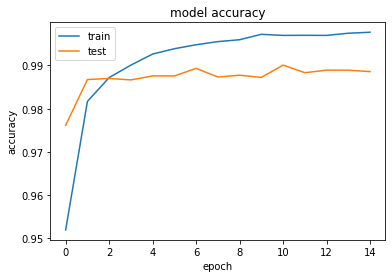

time: 133 ms


In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5538304   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 5,544,074
Trainable params: 5,544,074
Non-trainable params: 0
____________________________________________